In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

import re
import argparse
import logging

# import os
# import glob
import sys
from pathlib import Path

In [2]:
pd.set_option('display.max_columns', None)

In [8]:
machine = 'mixr'
if machine == 'laptop':
    # laptop directory
    directory = 'C:\\Users\\watson\\Documents\\GitHub\\SabberStone-master\\Sabber_Work_2019F\\thesis-output\\Z1vsZ2\\'
elif machine == 'desktop':
    # desktop directory
    # directory = 'C:\\Users\\watson\\Documents\\SabberStone 2019\\Sabber_Work_2019F\\thesis-output\\Z1vsZ2\\'
    directory = 'C:\\Users\\watson\\Documents\\SabberStone 2019\\Sabber_Work_2019F\\thesis-output\\Z1vsZ2Kong\\test_one\\'
elif machine == 'kong':
    directory = 'blah'
elif machine == 'mixr':
    directory = 'C:\\Users\\Main\\Documents\\GitHub\\Sabber_Work_2019F\\thesis-output\\Z1vsZ2Kong\\test_one'
elif machine == 'mixr2':
    directory = 'C:\\Users\\Main\\Documents\\GitHub\\Sabber_Work_2019F\\thesis-output\\{}'

In [9]:
directory

'C:\\Users\\Main\\Documents\\GitHub\\Sabber_Work_2019F\\thesis-output\\Z1vsZ2Kong\\test_one'

In [10]:
games = []
pathlist = Path(directory).glob('**\\*.txt')
filepaths = {}
for path in pathlist:
    #print('__________________________________________________________________')
    # because path is object not string
    game_name = str(path)
    game_csv_name = game_name.replace('.txt', '.csv')
    game_plot_name = game_name.replace('.txt', '.png')
    #print(game_name)
    #print(game_csv_name)
    #print(game_plot_name)
    parts = str(path).split('\\')
    game_id = parts[-1]
    filepaths[game_id] = game_name
    with open(game_csv_name) as f:
        df = pd.read_csv(f, index_col=0)
        id_col = [game_id for row in range(df.shape[0])]
        df.insert(0, "GAME_ID", game_id)
        games.append(df)
    #game_obj = GameFilter(game_name)
    #game_obj.parse_file(game_csv_name)
    #logging.info('Number of turns: {}'.format(len(game_obj.end_of_turn_data)))
    #game_obj.plot_data(game_plot_name)
len(games)

500

In [6]:
# filepaths['game04.txt']
filepaths['Z1vsZ2Logs1.txt']

'C:\\Users\\watson\\Documents\\SabberStone 2019\\Sabber_Work_2019F\\thesis-output\\Z1vsZ2Kong\\test_one\\Z1vsZ2Logs1.txt'

In [11]:
games_df = pd.concat(games)
games_df.reset_index(drop=True, inplace=True)
games_df.head(15)

GAME_ID  TURN_NO  P1_HEALTH  P2_HEALTH       CURRENT_PLAYER  \
0    Z1vsZ2Logs1.txt        1         30         30     P1 FitzVonGerald   
1    Z1vsZ2Logs1.txt        2         30         30  P2 RehHausZuckFuchs   
2    Z1vsZ2Logs1.txt        3         30         29     P1 FitzVonGerald   
3    Z1vsZ2Logs1.txt        4         27         29  P2 RehHausZuckFuchs   
4    Z1vsZ2Logs1.txt        5         27         24     P1 FitzVonGerald   
5    Z1vsZ2Logs1.txt        6         21         24  P2 RehHausZuckFuchs   
6    Z1vsZ2Logs1.txt        7         21         16     P1 FitzVonGerald   
7    Z1vsZ2Logs1.txt        8          8         16  P2 RehHausZuckFuchs   
8   Z1vsZ2Logs10.txt        1         30         30     P1 FitzVonGerald   
9   Z1vsZ2Logs10.txt        2         27         30  P2 RehHausZuckFuchs   
10  Z1vsZ2Logs10.txt        3         27         29     P1 FitzVonGerald   
11  Z1vsZ2Logs10.txt        4         22         29  P2 RehHausZuckFuchs   
12  Z1vsZ2Logs10.txt        5         22         28     P1 FitzVonGerald   
13  Z1vsZ2Logs10.txt        6         14         28  P2 RehHausZuckFuchs   
14  Z1vsZ2Logs10.txt        7         14         20     P1 FitzVonGerald   

    AMOUNTHEALEDTHISTURN  NUMATTACKSTHISTURN  NUMCARDSDRAWNTHISTURN  \
0                      0                   0                      1   
1                      0                   0                      1   
2                      0                   0                      1   
3                      0                   0                      1   
4                      0                   0                      1   
5                      0                   0                      1   
6                      0                   0                      1   
7                      0                   0                      1   
8                      0                   0                      1   
9                      0                   0                      1   
10                     0                   0                      1   
11                     0                   0                      1   
12                     0                   0                      1   
13                     0                   0                      1   
14                     0                   0                      1   

    NUMCARDSPLAYEDTHISTURN  NUMCARDSTODRAW  NUMELEMENTALSPLAYEDLASTTURN  \
0                        1               0                            0   
1                        1               0                            0   
2                        1               0                            0   
3                        3               0                            0   
4                        1               0                            0   
5                        1               0                            0   
6                        1               0                            0   
7                        1               0                            0   
8                        1               0                            0   
9                        3               0                            0   
10                       0               0                            0   
11                       0               0                            0   
12                       1               0                            0   
13                       1               0                            0   
14                       1               0                            0   

    NUMELEMENTALSPLAYEDTHISTURN  NUMFRIENDLYMINIONSTHATATTACKEDTHISTURN  \
0                             0                                       0   
1                             0                                       0   
2                             0                                       1   
3                             0                                       2   
4                             0                                       3   
5       

In [12]:
games_df.isnull().any()

GAME_ID                                   False
TURN_NO                                   False
P1_HEALTH                                 False
P2_HEALTH                                 False
CURRENT_PLAYER                            False
AMOUNTHEALEDTHISTURN                      False
NUMATTACKSTHISTURN                        False
NUMCARDSDRAWNTHISTURN                     False
NUMCARDSPLAYEDTHISTURN                    False
NUMCARDSTODRAW                            False
NUMELEMENTALSPLAYEDLASTTURN               False
NUMELEMENTALSPLAYEDTHISTURN               False
NUMFRIENDLYMINIONSTHATATTACKEDTHISTURN    False
NUMFRIENDLYMINIONSTHATDIEDTHISTURN        False
NUMMINIONSPLAYEDTHISTURN                  False
NUMMINIONSPLAYERKILLEDTHISTURN            False
NUMOPTIONSPLAYEDTHISTURN                  False
NUMSECRETSPLAYEDTHISGAME                  False
NUMSPELLSPLAYEDTHISGAME                   False
NUMTIMESHEROPOWERUSEDTHISGAME             False
REMAININGMANA                           

# > SKIP following code until CONTINUE <

## > Some rows *may* have RemainingMana == -1, which makes no sense. <

### Minimum E.O.T. mana for any player should be 0.

In [13]:
games_df.loc[(games_df['REMAININGMANA']<0)]

Empty DataFrame
Columns: [GAME_ID, TURN_NO, P1_HEALTH, P2_HEALTH, CURRENT_PLAYER, AMOUNTHEALEDTHISTURN, NUMATTACKSTHISTURN, NUMCARDSDRAWNTHISTURN, NUMCARDSPLAYEDTHISTURN, NUMCARDSTODRAW, NUMELEMENTALSPLAYEDLASTTURN, NUMELEMENTALSPLAYEDTHISTURN, NUMFRIENDLYMINIONSTHATATTACKEDTHISTURN, NUMFRIENDLYMINIONSTHATDIEDTHISTURN, NUMMINIONSPLAYEDTHISTURN, NUMMINIONSPLAYERKILLEDTHISTURN, NUMOPTIONSPLAYEDTHISTURN, NUMSECRETSPLAYEDTHISGAME, NUMSPELLSPLAYEDTHISGAME, NUMTIMESHEROPOWERUSEDTHISGAME, REMAININGMANA, TOTALMANASPENTTHISGAME, USEDMANATHISTURN]
Index: []

In [16]:
# games_df[30:34][['GAME_ID','TURN_NO', 'P1_HEALTH', 'P2_HEALTH', 'CURRENT_PLAYER', 'REMAININGMANA']]

In [18]:
some_code_01 = '''
flag = False
savedLines = []
with open(filepaths['game04.txt']) as f:
    lines = f.readlines()
    for line in lines:
        if 'turn no 8' in line:
            flag = True
        if flag:
            savedLines.append(line)
        if flag and line[0] == '_' and line[-2] == '|':
            break
savedLines
'''

### If the Remaining Mana is -1, it should be fixed in the data processing.

## Change the values where RemainingMana equals -1 into 0.

In [20]:
# games_df.loc[(games_df['REMAININGMANA']==-1)]

In [21]:
# games_df['REMAININGMANA'].replace(-1, 0, inplace=True)

In [22]:
# games_df.loc[(games_df['REMAININGMANA']==-1)]

## > All of the above should have been fixed in Sabber Code already < 

# > CONTINUE HERE <

In [86]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
X = games_df.select_dtypes(include=numerics)

In [88]:
cluster_cols = list(X.columns)
print(X.shape)
X.head(20)

(4630, 21)


TURN_NO  P1_HEALTH  P2_HEALTH  AMOUNTHEALEDTHISTURN  NUMATTACKSTHISTURN  \
0         1         30         30                     0                   0   
1         2         30         30                     0                   0   
2         3         30         29                     0                   0   
3         4         27         29                     0                   0   
4         5         27         24                     0                   0   
5         6         21         24                     0                   0   
6         7         21         16                     0                   0   
7         8          8         16                     0                   0   
8         1         30         30                     0                   0   
9         2         27         30                     0                   0   
10        3         27         29                     0                   0   
11        4         22         29                     0                   0   
12        5         22         28                     0                   0   
13        6         14         28                     0                   0   
14        7         14         20                     0                   0   
15        8          0         20                     0                   0   
16        1         30         30                     0                   0   
17        2         28         30                     0                   0   
18        3         28         25                     0                   0   
19        4         24         25                     0                   0   

    NUMCARDSDRAWNTHISTURN  NUMCARDSPLAYEDTHISTURN  NUMCARDSTODRAW  \
0                       1                       1               0   
1                       1                       1               0   
2                       1                       1               0   
3                       1                       3               0   
4                       1                       1               0   
5                       1                       1               0   
6                       1                       1               0   
7                       1                       1               0   
8                       1                       1               0   
9                       1                       3               0   
10                      1                       0               0   
11                      1                       0               0   
12                      1                       1               0   
13                      1                       1               0   
14                      1                       1               0   
15                      1                       1               0   
16                      1                       1               0   
17                      1                       3               0   
18                      1                       1               0   
19                      1                       1               0   

    NUMELEMENTALSPLAYEDLASTTURN  NUMELEMENTALSPLAYEDTHISTURN  \
0                             0                            0   
1                             0                            0   
2                             0                            0   
3                             0                            0   
4                             0                            0   
5                             0                            0   
6                             0                            0   
7                             0                            0   
8                             0                            0   
9                             0                            0   
10                            0                            0   
11                            0                            0   
12                            0                            0  

In [111]:
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

In [89]:
# Split ALL columns
(X_train, X_test) = train_test_split(X, test_size=0.30)

In [90]:
print(X_train.shape)
print(X_test.shape)

(3241, 21)
(1389, 21)


In [34]:
cols_to_cluster = ['P1_HEALTH', 'P2_HEALTH', 'NUMFRIENDLYMINIONSTHATATTACKEDTHISTURN', 'USEDMANATHISTURN']

In [98]:
X

TURN_NO  P1_HEALTH  P2_HEALTH  AMOUNTHEALEDTHISTURN  NUMATTACKSTHISTURN  \
0           1         30         30                     0                   0   
1           2         30         30                     0                   0   
2           3         30         29                     0                   0   
3           4         27         29                     0                   0   
4           5         27         24                     0                   0   
...       ...        ...        ...                   ...                 ...   
4625        4         25         26                     0                   0   
4626        5         25         23                     0                   0   
4627        6         17         23                     0                   0   
4628        7         17         19                     0                   0   
4629        8          0         19                     0                   0   

      NUMCARDSDRAWNTHISTURN  NUMCARDSPLAYEDTHISTURN  NUMCARDSTODRAW  \
0                         1                       1               0   
1                         1                       1               0   
2                         1                       1               0   
3                         1                       3               0   
4                         1                       1               0   
...                     ...                     ...             ...   
4625                      1                       2               0   
4626                      1                       1               0   
4627                      1                       2               0   
4628                      1                       1               0   
4629                      1                       1               0   

      NUMELEMENTALSPLAYEDLASTTURN  NUMELEMENTALSPLAYEDTHISTURN  \
0                               0                            0   
1                               0                            0   
2                               0                            0   
3                               0                            0   
4                               0                            0   
...                           ...                          ...   
4625                            0                            0   
4626                            0                            0   
4627                            0                            0   
4628                            0                            0   
4629                            0                            0   

      NUMFRIENDLYMINIONSTHATATTACKEDTHISTURN  \
0                                          0   
1                                          0   
2                                          1   
3                                          2   
4                                          3   
...                                      ...   
4625                                       2   
4626                                       0   
4627                                       3   
4628                                       0   
4629                                       5   

      NUMFRIENDLYMINIONSTHATDIEDTHISTURN  NUMMINIONSPLAYEDTHISTURN  \
0                                      0                         1   
1                                      0                         1   
2                                      0                         1   
3                                      0                         2   
4                                      0                         1   
...                                  ...                       ...   
4625                                   0                         1   
4626                                   0                         0   
4627                                   0                         1   
4628                                   0                         1   
4629                                   0

In [91]:
X_cluster = X_train#[cols_to_cluster]

In [92]:
centers_list = []

In [96]:
distortions = []
K = list(range(1,15))
for k in K:
    print('k={}{}'.format(k, '.'*k))
    kmeanModel = KMeans(n_clusters=k)#.fit(X)
    kmeanModel.fit(X_cluster)
    centers = kmeanModel.cluster_centers_
    centers_list.append(np.array(centers))
    distortions.append( sum( np.min( cdist(X_cluster, centers, 'euclidean'), axis=1 ) ) / X_cluster.shape[0] )

k=1.
k=2..
k=3...
k=4....
k=5.....
k=6......
k=7.......
k=8........
k=9.........
k=10..........
k=11...........
k=12............
k=13.............
k=14..............


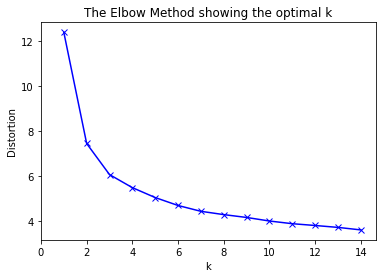

In [97]:
# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.xticks(np.arange(0, K[-1]+1, 2))
plt.show()

In [35]:
# Create the KMeans object
kmeans = KMeans(n_clusters=7, n_init=3, max_iter=500, random_state=1)

In [36]:
# Cluster using SOME columns
kmeans = kmeans.fit(X_train[cols_to_cluster])

In [55]:
# Save the labels (if there are any, but there aren't)
# X_train.loc[:,'labels'] = kmeans.labels_

In [99]:
opt_centers = centers_list[2]

In [100]:
pd.DataFrame(opt_centers, columns = cluster_cols)

TURN_NO  P1_HEALTH  P2_HEALTH  AMOUNTHEALEDTHISTURN  NUMATTACKSTHISTURN  \
0  6.440605  19.441685  18.426566              0.010799                 0.0   
1  2.839483  27.766298  27.732472              0.004920                 0.0   
2  8.856313   8.014514   7.441219              0.020319                 0.0   

   NUMCARDSDRAWNTHISTURN  NUMCARDSPLAYEDTHISTURN  NUMCARDSTODRAW  \
0               1.011879                1.265659             0.0   
1               1.000000                1.169742             0.0   
2               1.005806                1.217707             0.0   

   NUMELEMENTALSPLAYEDLASTTURN  NUMELEMENTALSPLAYEDTHISTURN  \
0                          0.0                          0.0   
1                          0.0                          0.0   
2                          0.0                          0.0   

   NUMFRIENDLYMINIONSTHATATTACKEDTHISTURN  NUMFRIENDLYMINIONSTHATDIEDTHISTURN  \
0                                2.536717                            0.129590   
1                                0.674662                            0.004305   
2                                3.119013                            0.178520   

   NUMMINIONSPLAYEDTHISTURN  NUMMINIONSPLAYERKILLEDTHISTURN  \
0                  0.943844                        0.225702   
1                  0.649446                        0.008610   
2                  0.843251                        0.357039   

   NUMOPTIONSPLAYEDTHISTURN  NUMSECRETSPLAYEDTHISGAME  \
0                  4.603672                       0.0   
1                  2.458180                       0.0   
2                  5.039187                       0.0   

   NUMSPELLSPLAYEDTHISGAME  NUMTIMESHEROPOWERUSEDTHISGAME  REMAININGMANA  \
0                 1.272138                       0.085313       0.264579   
1                 0.803198                       0.012300       0.388069   
2                 1.375907                       0.134978       1.098694   

   TOTALMANASPENTTHISGAME  USEDMANATHISTURN  
0                7.241901          3.222462  
1                2.242927          1.306273  
2               11.605225          3.574746

In [101]:
for i in range(len(cluster_cols)):
    print(i, cluster_cols[i])

0 TURN_NO
1 P1_HEALTH
2 P2_HEALTH
3 AMOUNTHEALEDTHISTURN
4 NUMATTACKSTHISTURN
5 NUMCARDSDRAWNTHISTURN
6 NUMCARDSPLAYEDTHISTURN
7 NUMCARDSTODRAW
8 NUMELEMENTALSPLAYEDLASTTURN
9 NUMELEMENTALSPLAYEDTHISTURN
10 NUMFRIENDLYMINIONSTHATATTACKEDTHISTURN
11 NUMFRIENDLYMINIONSTHATDIEDTHISTURN
12 NUMMINIONSPLAYEDTHISTURN
13 NUMMINIONSPLAYERKILLEDTHISTURN
14 NUMOPTIONSPLAYEDTHISTURN
15 NUMSECRETSPLAYEDTHISGAME
16 NUMSPELLSPLAYEDTHISGAME
17 NUMTIMESHEROPOWERUSEDTHISGAME
18 REMAININGMANA
19 TOTALMANASPENTTHISGAME
20 USEDMANATHISTURN


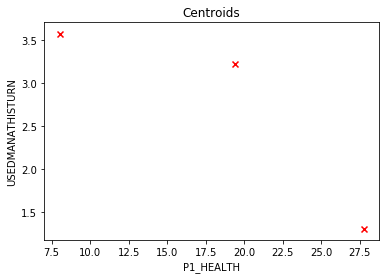

In [104]:
x1 = 1
y1 = 20

plt.title('Centroids')
plt.ylabel(cluster_cols[y1])
plt.xlabel(cluster_cols[x1])
plt.scatter(opt_centers[:,x1], opt_centers[:,y1], marker="x", color='r')
plt.show()

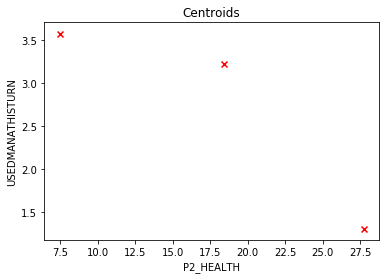

In [106]:
x2 = 2
y2 = 20

plt.title('Centroids')
plt.ylabel(cluster_cols[y2])
plt.xlabel(cluster_cols[x2])
plt.scatter(opt_centers[:,x2], opt_centers[:,y2], marker="x", color='r')
plt.show()

In [107]:
# games_df.loc[(games_df['P1_HEALTH'].isin(list(range(25, 30))))]

In [108]:
# games_df.loc[(games_df['P1_HEALTH'].isin(list(range(0, 10))))]

In [41]:
from sklearn.preprocessing import StandardScaler
# features = ['sepal length', 'sepal width', 'petal length', 'petal width']
# Separating out the features
# x = df.loc[:, features].values
# Separating out the target
# y = df.loc[:,['target']].values
# Standardizing the features
x = StandardScaler().fit_transform(numeric_cols)
xdf = pd.DataFrame(x, columns = numeric_cols.columns)

In [42]:
xdf.shape

(196, 21)

In [43]:
xdf.head()

TURN_NO  P1_HEALTH  P2_HEALTH  AMOUNTHEALEDTHISTURN  NUMATTACKSTHISTURN  \
0 -1.492152   0.812950   1.047238                   0.0                 0.0   
1 -1.162432   0.812950   1.047238                   0.0                 0.0   
2 -0.832712   0.812950   0.608963                   0.0                 0.0   
3 -0.502992   0.678488   0.608963                   0.0                 0.0   
4 -0.173271   0.678488  -0.267586                   0.0                 0.0   

   NUMCARDSDRAWNTHISTURN  NUMCARDSPLAYEDTHISTURN  NUMCARDSTODRAW  \
0              -0.188857               -0.628342             0.0   
1              -0.188857               -0.628342             0.0   
2              -0.188857                0.740047             0.0   
3              -0.188857                0.740047             0.0   
4              -0.188857                0.740047             0.0   

   NUMELEMENTALSPLAYEDLASTTURN  NUMELEMENTALSPLAYEDTHISTURN  ...  \
0                          0.0                          0.0  ...   
1                          0.0                          0.0  ...   
2                          0.0                          0.0  ...   
3                          0.0                          0.0  ...   
4                          0.0                          0.0  ...   

   NUMFRIENDLYMINIONSTHATDIEDTHISTURN  NUMMINIONSPLAYEDTHISTURN  \
0                           -0.480261                 -0.073458   
1                           -0.480261                 -0.073458   
2                           -0.480261                  1.526289   
3                           -0.480261                 -0.073458   
4                            1.088592                 -0.073458   

   NUMMINIONSPLAYERKILLEDTHISTURN  NUMOPTIONSPLAYEDTHISTURN  \
0                       -0.551942                 -1.246908   
1                       -0.551942                 -1.246908   
2                       -0.551942                 -0.128400   
3                       -0.551942                 -0.128400   
4                        0.405409                  0.990108   

   NUMSECRETSPLAYEDTHISGAME  NUMSPELLSPLAYEDTHISGAME  \
0                       0.0                -1.320328   
1                       0.0                -1.320328   
2                       0.0                -1.320328   
3                       0.0                -0.259737   
4                       0.0                -0.259737   

   NUMTIMESHEROPOWERUSEDTHISGAME  REMAININGMANA  TOTALMANASPENTTHISGAME  \
0                      -0.219382      -0.579284               -1.197500   
1                      -0.219382      -0.579284               -1.197500   
2                      -0.219382      -0.579284               -0.732728   
3                      -0.219382      -0.579284               -0.500341   
4                      -0.219382      -0.579284               -0.035569   

   USEDMANATHISTURN  
0         -0.915734  
1         -0.915734  
2         -0.192009  
3         -0.192009  
4          0.531717  

[5 rows x 21 columns]

In [44]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

In [46]:
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [42]:
# principalDf

In [110]:
elbows = '''
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

x1 = np.array([3, 1, 1, 2, 1, 6, 6, 6, 5, 6, 7, 8, 9, 8, 9, 9, 8])
x2 = np.array([5, 4, 5, 6, 5, 8, 6, 7, 6, 7, 1, 2, 1, 2, 3, 2, 3])

plt.plot()
plt.xlim([0, 10])
plt.ylim([0, 10])
plt.title('Dataset')
plt.scatter(x1, x2)
plt.show()

# create new plot and data
plt.plot()
X = np.array(list(zip(x1, x2))).reshape(len(x1), 2)
colors = ['b', 'g', 'r']
markers = ['o', 'v', 's']

# k means determine k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()
'''